In [1]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import mdtraj as md
import nglview as ngl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
traj = md.load('butane_sim.dcd', top='butane.pdb')

In [3]:
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x19c96d84700>

In [4]:
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


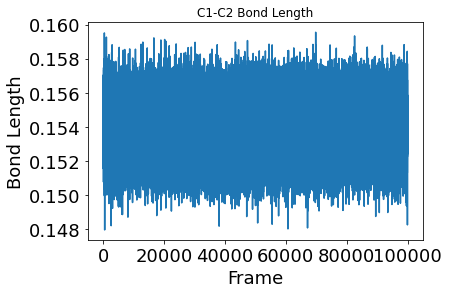

In [5]:
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C1C2bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

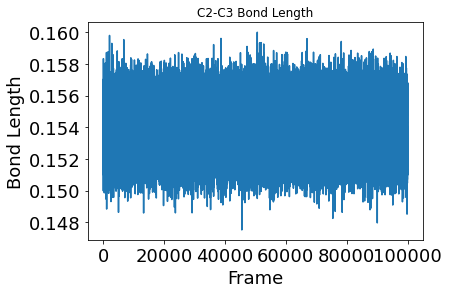

In [6]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C2C3bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

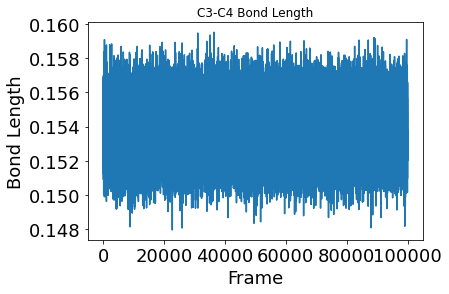

In [7]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
plt.plot(C3C4bondlength)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

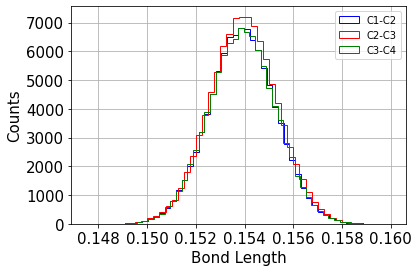

In [8]:
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

C:\Users\kbche\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Line Parameters: [0.50011457 0.07697297]


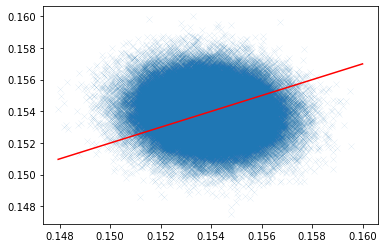

r2: -0.10225722938874528
Line Parameters: [0.49997952 0.07695218]


C:\Users\kbche\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


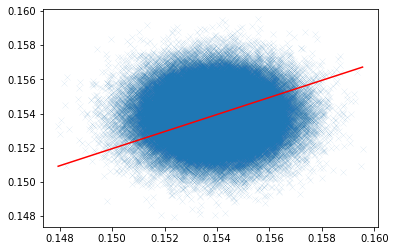

r2: 0.007219833676916035


In [9]:
plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',linewidth=0.05)


line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

HOMEWORK QUESTION 1:

First plot: correlation between C1-C2 and C2-C3
Second plot: correlation between C1-C2 and C3-C4
In first case the two pairs have the common C2 atom so more correlated

HOMEWORK PROBLEM 1:

a: 0.18843305428911974 x0: 0.15389991305023623 fit_sigma: -0.0013739653493097773
a: 0.18678762921818223 x0: 0.15394447693048896 fit_sigma: -0.0013869758782522129
a: 0.18783167450580557 x0: 0.1539021063847374 fit_sigma: -0.001380324425479944


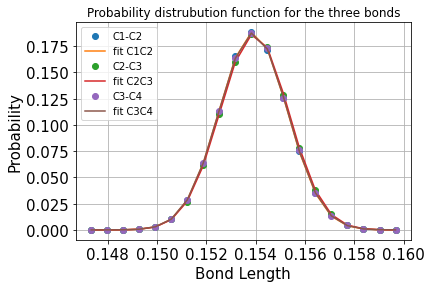

In [10]:
from scipy.optimize import curve_fit

def histogram_bincenters(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma] 

C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)
C1C2_fit,C1C2_fit_params=fit_gauss(centers,C1C2_density)

C2C3_density,centers=histogram_bincenters(C2C3bondlength,0.147,0.160,20)
C2C3_fit,C2C3_fit_params=fit_gauss(centers,C2C3_density)

C3C4_density,centers=histogram_bincenters(C3C4bondlength,0.147,0.160,20)
C3C4_fit,C3C4_fit_params=fit_gauss(centers,C3C4_density)


plt.plot(centers, C1C2_density, 'o',label='C1-C2')
plt.plot(centers, C1C2_fit, '-', label='fit C1C2')

plt.plot(centers, C2C3_density, 'o', label='C2-C3')
plt.plot(centers, C2C3_fit, '-', label='fit C2C3')

plt.plot(centers, C3C4_density, 'o', label='C3-C4')
plt.plot(centers, C3C4_fit, '-', label='fit C3C4')

plt.legend(loc=2)
plt.title("Probability distrubution function for the three bonds")
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

HOMEWORK PROBLEM 2:

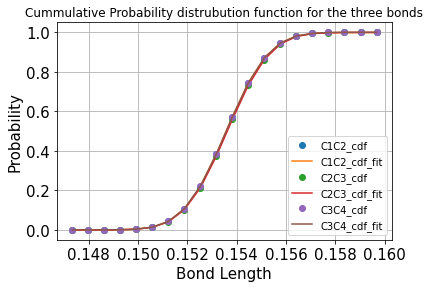

In [11]:
C1C2_cdf = np.cumsum(C1C2_density)
C1C2_fit_cdf = np.cumsum(C1C2_fit)
plt.plot(centers, C1C2_cdf, 'o', label='C1C2_cdf')
plt.plot(centers, C1C2_fit_cdf, '-', label='C1C2_cdf_fit')

C2C3_cdf = np.cumsum(C2C3_density)
C2C3_fit_cdf = np.cumsum(C2C3_fit)
plt.plot(centers, C2C3_cdf, 'o', label='C2C3_cdf')
plt.plot(centers, C2C3_fit_cdf, '-', label='C2C3_cdf_fit')

C3C4_cdf = np.cumsum(C3C4_density)
C3C4_fit_cdf = np.cumsum(C3C4_fit)
plt.plot(centers, C3C4_cdf, 'o', label='C3C4_cdf')
plt.plot(centers, C3C4_fit_cdf, '-', label='C3C4_cdf_fit')

plt.legend(loc=4)
plt.title("Cummulative Probability distrubution function for the three bonds")
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Probability', size=15)
plt.yticks(size=15)
plt.grid()
plt.show()

HOMEWORK PROBLEM 3: Not exactly sure how to load random frames from a trajectory

In [12]:
trajrand = md.load('butane_sim.dcd', stride =np.random.randint(10000) ,top='butane.pdb')
trajrand

<mdtraj.Trajectory with 14 frames, 14 atoms, 1 residues, without unitcells at 0x19ca61e7a30>

In [13]:
sample = trajrand[0:10]


In [15]:
counts, bins_count = np.histogram(sample, bins=20)
probability = counts / sum(count)
plt.plot(bins_count[1:], probability)
plt.xlabel("Random Sample")
plt.ylabel("Probability")
plt.grid()
plt.show()

TypeError: '<=' not supported between instances of 'Trajectory' and 'Trajectory'

(100000, 2)


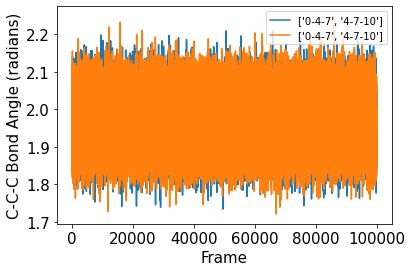

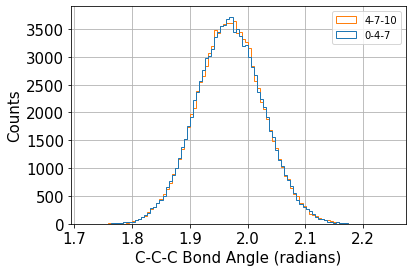

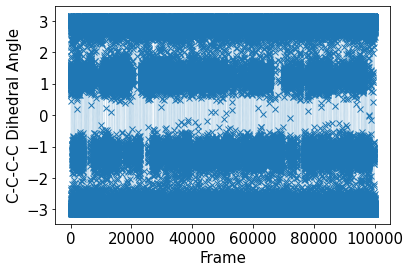

In [16]:
#Lets Compute Some Bond Angles 
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
#ang=np.degrees(angle_rad)
print(np.shape(ang))
plt.plot(ang,label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C Bond Angle (radians)', size=15)
plt.yticks(size=15)
plt.show()

plt.show()
plt.clf()
plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle (radians)', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.grid()
plt.show()
plt.clf()

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])

#plt.plot(CCCC_torsion)
plt.plot(CCCC_torsion,marker='x',linewidth=.01)
#plt.xlim(0,2000)
plt.xlabel('Frame', size=15)
plt.xticks(size=15)
plt.ylabel('C-C-C-C Dihedral Angle', size=15)
plt.yticks(size=15)
plt.show()

r2: -0.0026192351303431912
[-5.70065811e-05  1.96838228e+00]


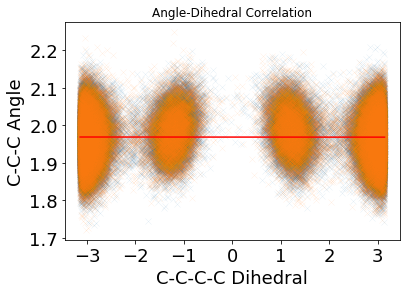

In [17]:
#Are the bond angle and dihedral correlated?

ang1=ang[:,0]
ang2=ang[:,1]

plt.scatter(CCCC_torsion,ang1,marker='x',linewidth=0.04)
plt.scatter(CCCC_torsion,ang2,marker='x',linewidth=0.04)

r=np.corrcoef(CCCC_torsion[:,0], ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_torsion[:,0],ang1,1)
x = np.linspace(min(CCCC_torsion[:,0]), max(CCCC_torsion[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print(line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('C-C-C-C Dihedral', size=18)
plt.ylabel('C-C-C Angle', size=18)
plt.title('Angle-Dihedral Correlation')

plt.show()

HOMEWORK PROBLEM 3:

Tried for a while np.where to find out where the angles are >1 and <2, but could not get it to work correctly due to time comstraint. Would like to learn (later on after we submit our assignment) how we can use that instead of a for loop that I ended up doing

In [18]:
f = 0
condition_angle = []
for x in CCCC_torsion:
    if x >= 1 and x <= 2:
        condition_angle.append(ang1[f])
        
    f = f + 1

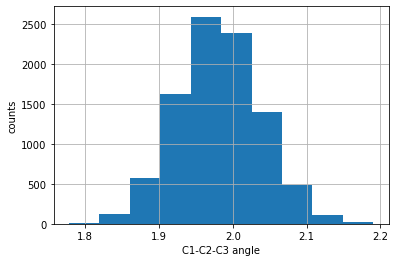

In [19]:
plt.hist(condition_angle, bins = 10)
plt.grid()
plt.xlabel("C1-C2-C3 angle")
plt.ylabel("counts")
plt.show()

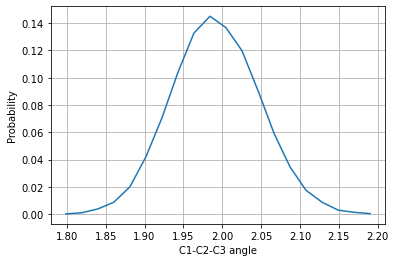

In [20]:
count, edges = np.histogram(condition_angle, bins=20)
density_angle = count / np.sum(count)

plt.plot(edges[1:], density_angle )
plt.xlabel("C1-C2-C3 angle")
plt.ylabel("Probability")
plt.grid()
plt.show()

C:\Users\kbche\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


a: -11.984347404693164 x0: 14.650134819476849 fit_sigma: -1.2591353010391075


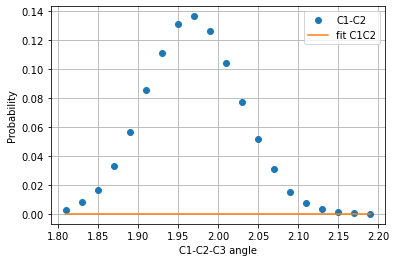

In [21]:
count, edges = np.histogram(condition_angle, bins=20)
density_angle = count / np.sum(count)

C1C2C3_angle_density,centers=histogram_bincenters(ang1,1.8, 2.2 ,20)
C1C2C3_angle_fit,C1C2C3_angle_fit_params=fit_gauss(centers,C1C2C3_angle_density)

plt.plot(centers, C1C2C3_angle_density, 'o', label='C1-C2')
plt.plot(centers, C1C2C3_angle_fit, '-', label='fit C1C2')

plt.xlabel("C1-C2-C3 angle")
plt.ylabel("Probability")
plt.grid()
plt.legend()
plt.show()

#need to check this properly to get it to work

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


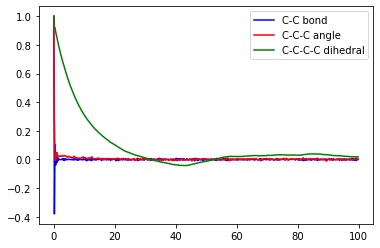

In [22]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

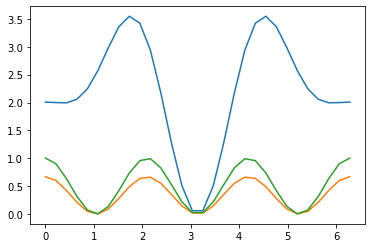

In [23]:
#Plot The Torsion Force Field Terms
import math
#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

In [24]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [ ]:
#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

HOMEWORK PROBLEM 5:

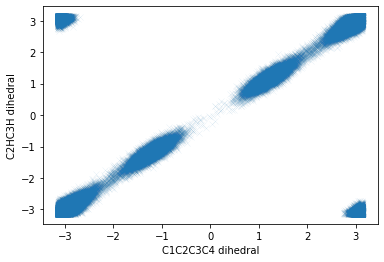

In [26]:
#highly correlated torsions:
CCCC_dih = md.compute_dihedrals(traj, [[0,4,7,10]])
CCCC_dih
C2H_C3H_dih = md.compute_dihedrals(traj, [[8,7,4,5]])
C2H_C3H_dih
plt.scatter(CCCC_dih, C2H_C3H_dih, marker='x', linewidth=0.04)
plt.xlabel("C1C2C3C4 dihedral")
plt.ylabel("C2HC3H dihedral")
plt.show()

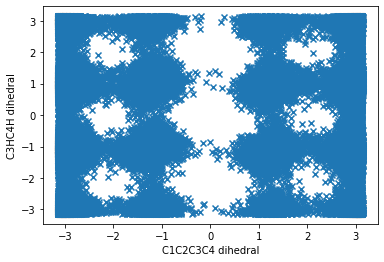

In [27]:
#uncorrelated torsions:
CCCC_dih = md.compute_dihedrals(traj, [[0,4,7,10]])
C3H_C4H_dih = md.compute_dihedrals(traj, [[12,10,7,9]])
plt.scatter(CCCC_dih, C3H_C4H_dih, marker='x')
plt.xlabel("C1C2C3C4 dihedral")
plt.ylabel("C3HC4H dihedral")
plt.show()

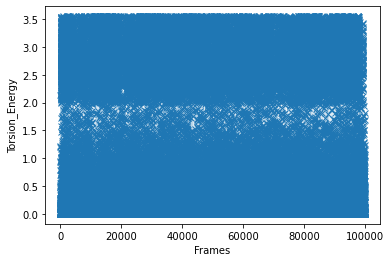

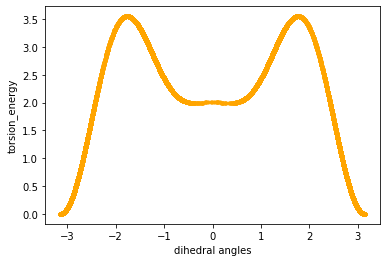

In [28]:
torsion_energy = []
for x in CCCC_torsion:
    torsion_energy.append(CCCC_torsionE(x))
#print(torsion_energy)

plt.plot(torsion_energy, marker = 'x', linewidth=0.04)
plt.xlabel("Frames")
plt.ylabel("Torsion_Energy")
plt.show()
plt.clf()

plt.scatter(CCCC_torsion, torsion_energy, s= 10, color='orange')
plt.xlabel("dihedral angles")
plt.ylabel("torsion_energy")
plt.show()

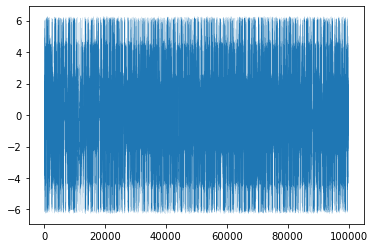

In [35]:
offset = CCCC_dih - C3H_C4H_dih 
plt.plot(offset, linewidth= 0.08)

At -pi and pi radians, the molecule is at anti conformation(C1 and C4 are completely opposite to each other) so energy is less and stable. At around -2pi and 2pi the molecule is at eclipsed conformation and hence unstable.

HOMEWORK PROBLEM 6:

<PeriodicTorsionForce>
<Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.4860" periodicity2="2" phase2="3.1416" k2="1.690" periodicity3="1" phase3="0.0" k3="0.3890"/>
<Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
<Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

HOMEWORK PROBLEM 7:


In [57]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import mdtraj as md
import nglview as ngl
import numpy as np
import matplotlib.pyplot as plt

In [58]:
pdb = app.PDBFile('butane.pdb')
forcefield = app.ForceField('butane.new.gaff2.xml')

In [59]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [60]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692153 kJ/mol
Potential energy after minimization is 5.295784501113978 kJ/mol


In [61]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,34.49284112086667,201.96442846354842
200,33.92721320760116,100.48645419646924
300,25.46458212221905,266.8360493138726
400,35.11044410987498,250.09084200002286
500,35.287644522151346,159.4440453806396
600,47.21005981201186,232.7757542732809
700,27.624626504053403,351.69859318259824
800,40.555221198605274,384.2333788501456
900,46.81876390377392,184.01056195815346
1000,46.558854853783025,213.83903059451987
1100,30.467276699595807,307.4586172354551
1200,36.99905086577377,260.80896197692806
1300,39.372595056002275,299.05879982167454
1400,34.08451936320192,312.06746420153627
1500,35.082613326236434,152.77434234912684
1600,41.98610932023546,307.1979993277478
1700,48.17443743001615,534.3975363756244
1800,48.243032318786206,489.8752254618919
1900,34.22179170796301,524.0990689149095
2000,34.643572435249546,273.53196074058525
2100,30.04616187732166,295.4678619237007
2200,28.40719567931228,221.24842120175222
2300,42.992822

In [63]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('butane_new_sim1.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,54.54891324166569,202.04059396942807,--
500000,999.9999999901769,40.08946068316128,213.4062072757264,1.03e+04
750000,1499.9999999783536,44.99337151079231,233.09602520145137,1.16e+04
1000000,1999.9999999665301,45.3939949090923,352.02373946093337,1.3e+04
1250000,2499.9999999547067,48.741401023026214,378.260582538583,1.4e+04
1500000,2999.9999999428833,41.866006218313515,304.75978239758314,1.45e+04
1750000,3499.99999993106,52.68825799332193,253.12357824384395,1.49e+04
2000000,3999.9999999192364,46.81079684365431,497.6230977814766,1.52e+04
2250000,4499.9999999992715,44.97613824028435,332.22183243695576,1.54e+04
2500000,5000.000000101135,44.69071305467939,204.13354456972158,1.56e+04
2750000,5500.000000202998,40.87699233602948,215.15554301520095,1.57e+04
3000000,6000.000000304862,39.1636144043688,397.1999313090017,1.58e+04
3250000,6500.000000406725,33.715363901692

In [64]:
new_traj = md.load('butane_new_sim1.dcd', top='butane.pdb')

OSError: Could not open file: butane_new_sim1.dcd